In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style = 'ticks')
import pandas as pd

### For Valve

In [2]:
def eval_c(w, ν, E, t):
    C = (6*(w**6)*(1-ν**2))/((np.pi**4)*E*(t**3))
    return C

In [3]:
def eval_vol(w, h):
    V = w*w*h
    return V

In [4]:
w = 0.5*10**(-3)
ν = 0.5
E = 750*10**3
t = 100*10**(-6)
h = 100*10**(-6)

In [5]:
C_l = eval_c(w, ν, E, t)

In [6]:
C_g = eval_vol(w, h)/(10**5)

In [7]:
p = [[0/256, 0/256, 0/256,1], [213/256, 94/256, 0/256, 1], [0/256,114/256,178/256, 1],
     [120/256, 120/256, 120/256,1]]

m = ['>', 'D', 'o', 's']

d = [(1,0),(2,2), (1,1), (4,2)]

loc = '/Users/vishwavasani/Dropbox (GaTech)/Vishwa@GATech/Air Oscillator/Plots/Seaborn'

In [8]:
P_range = np.linspace(101325 + 5*10**3, 101325 + 10*10**3, 100)
C_gas = eval_vol(w,h)/P_range
C_membrane = eval_c(w, ν, E, t)*np.linspace(1,1,100)
C_liquid = eval_vol(w,h)/(2.2*10**9)*np.linspace(1,1,100)

/var/folders/9x/bp1w9_ts2771qtwyp_k_pxgr0000gn/T/ipykernel_57555/1901199000.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_1 = data.drop(["Liquid Capacitance", "Membrane Capacitance"], 1)


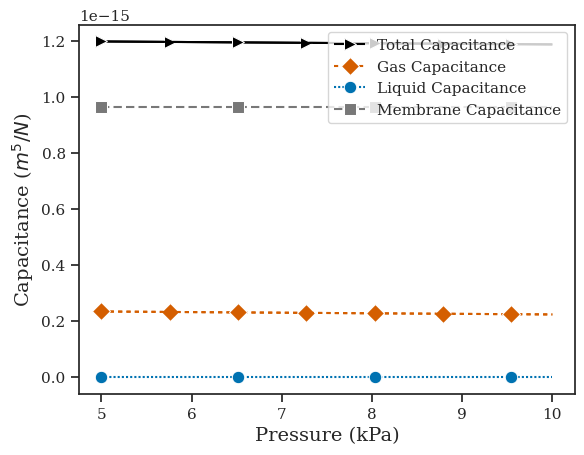

In [9]:
dat = np.transpose(np.array([C_gas + C_membrane, C_gas, C_liquid, C_membrane]))
data = pd.DataFrame(dat, (P_range-101325)/1000, columns = ['Total Capacitance', 'Gas Capacitance', 
                                                         'Liquid Capacitance', 'Membrane Capacitance'])

plt.rc('font', family = 'serif')
fig = plt.plot(figsize = (7.2, 4.45))

data_1 = data.drop(["Liquid Capacitance", "Membrane Capacitance"], 1)
sb.lineplot(data = data_1, palette = [p[0], p[1]], dashes = [d[0], d[1]], markers = [m[0], m[1]], 
            markevery = 15, markersize = 9, legend = False)

sb.lineplot(data=data, palette = p, dashes = d, markers = m, 
            markevery = 30, markersize = 9, linewidth=1.5)

#sb.boxplot(data=data, palette = p)
    
plt.yscale('linear')
plt.legend(loc='upper right')
plt.xlabel('Pressure (kPa)', size=14)
plt.ylabel('Capacitance ($m^5/N$)', size = 14)

plt.savefig(loc + 'valve_capacitance_linear.svg',dpi=400)

In [10]:
data.to_csv(r"/Users/vishwavasani/Dropbox (GaTech)/Vishwa@GATech/Air Oscillator/Final Paper/Valve-Capacitance.csv")

/var/folders/9x/bp1w9_ts2771qtwyp_k_pxgr0000gn/T/ipykernel_57555/1266341866.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_1 = data.drop(["Gas Capacitance", "Membrane Capacitance"], 1)


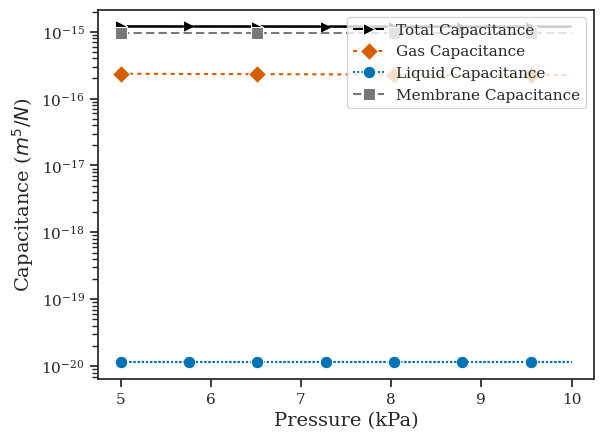

In [11]:
dat = np.transpose(np.array([C_gas + C_membrane, C_gas, C_liquid, C_membrane]))
data = pd.DataFrame(dat, (P_range-101325)/1000, columns = ['Total Capacitance', 'Gas Capacitance', 
                                                         'Liquid Capacitance', 'Membrane Capacitance'])

plt.rc('font', family = 'serif')
fig = plt.plot(figsize = (7.2, 4.45))

data_1 = data.drop(["Gas Capacitance", "Membrane Capacitance"], 1)
sb.lineplot(data = data_1, palette = [p[0], p[2]], dashes = [d[0], d[2]], markers = [m[0], m[2]], 
            markevery = 15, markersize = 9, legend = False)

sb.lineplot(data=data, palette = p, dashes = d, markers = m, 
            markevery = 30, markersize = 9, linewidth=1.5)

plt.yscale('log')
plt.legend(loc='upper right')
plt.xlabel('Pressure (kPa)', size=14)
plt.ylabel('Capacitance ($m^5/N$)', size = 14)

plt.savefig(loc + 'valve_capacitance_log.svg',dpi=400)

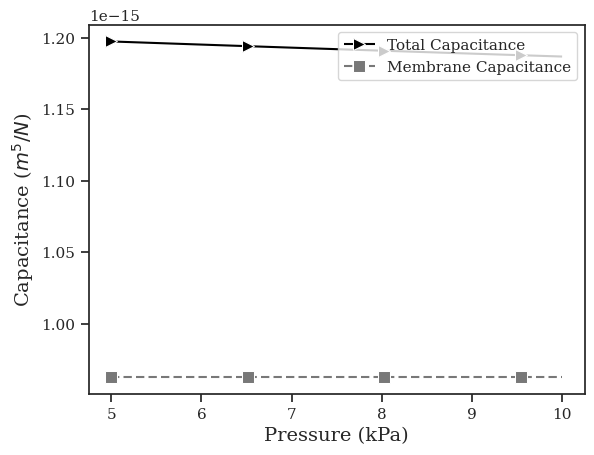

In [12]:
dat = np.transpose(np.array([C_gas + C_membrane, C_membrane]))
data = pd.DataFrame(dat, (P_range-101325)/1000, columns = ['Total Capacitance', 'Membrane Capacitance'])

plt.rc('font', family = 'serif')
fig = plt.plot(figsize = (7.2, 4.45))

#data_1 = data.drop(["Liquid Capacitance", "Membrane Capacitance"], 1)
#sb.lineplot(data = data_1, palette = [p[0], p[1]], dashes = [d[0], d[1]], markers = [m[0], m[1]], 
#            markevery = 15, markersize = 9, legend = False)

sb.lineplot(data=data, palette = [p[0], p[3]], dashes = [d[0], d[3]], markers = [m[0], m[3]], 
            markevery = 30, markersize = 9, linewidth=1.5)

plt.yscale('linear')
plt.legend(loc='upper right')
plt.xlabel('Pressure (kPa)', size=14)
plt.ylabel('Capacitance ($m^5/N$)', size = 14)

plt.savefig(loc + 'exploded_valve_capacitance_linear.svg',dpi=400)

Have liquid line. With zoom in for gas and liquid. 

### For Syringe - 60 mL

In [13]:
r        = 26.72/2 * 10**(-3) #in m
b        = 15 * 10**(-3) - r  #in m
l        = 60*10**(-6)/(3.14*(r**2)) #in m
V        = 60*10**(-6) #in m3
E        = 1.67*10**9 #in Pa
v        = 0.5
C_device = 2*V*r/(b*E)*(1-v/2)*np.linspace(1,1,100)
C_gas    = 60*10**(-6)/(P_range)
C_liquid = 60*10**(-6)/(2.2*10**9)*np.linspace(1,1,100)

In [14]:
l

0.1070554265053934

/var/folders/9x/bp1w9_ts2771qtwyp_k_pxgr0000gn/T/ipykernel_57555/1263950394.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_1 = data_s.drop(["Gas Capacitance", "Syringe Capacitance"], 1)


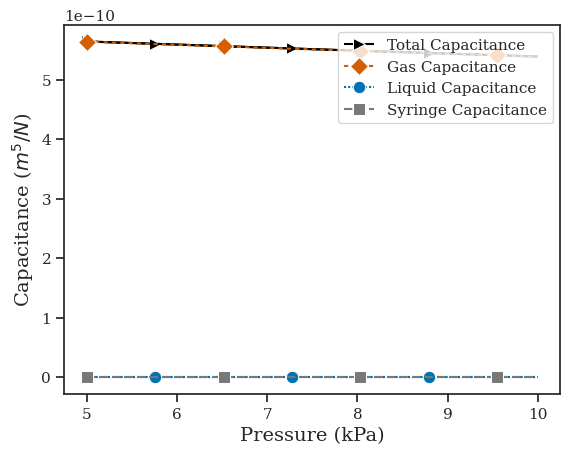

In [15]:
dat = np.transpose(np.array([C_gas + C_device, C_gas, C_liquid, C_device*np.linspace(1,1,100)]))
data_s = pd.DataFrame(dat, (P_range-101325)/1000, columns = ['Total Capacitance', 'Gas Capacitance', 
                                                         'Liquid Capacitance', 'Syringe Capacitance'])

plt.rc('font', family = 'serif')
fig = plt.plot(figsize = (7.2, 4.45))

data_1 = data_s.drop(["Gas Capacitance", "Syringe Capacitance"], 1)
sb.lineplot(data = data_1, palette = [p[0], p[2]], dashes = [d[0], d[2]], markers = [m[0], m[2]], 
            markevery = 15, markersize = 9, legend = False)

sb.lineplot(data=data_s, palette = p, dashes = d, markers = m, 
            markevery = 30, markersize = 9, linewidth=1.5)

plt.yscale('linear')
plt.legend(loc='upper right')
plt.xlabel('Pressure (kPa)', size=14)
plt.ylabel('Capacitance ($m^5/N$)', size = 14)

plt.savefig(loc + 'syringe_capacitance_linear.svg',dpi=400)

In [16]:
data_s.to_csv(r"/Users/vishwavasani/Dropbox (GaTech)/Vishwa@GATech/Air Oscillator/Final Paper/Syringe-Capacitance.csv")

/var/folders/9x/bp1w9_ts2771qtwyp_k_pxgr0000gn/T/ipykernel_57555/4135408604.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_1 = data.drop(["Gas Capacitance", "Syringe Capacitance"], 1)


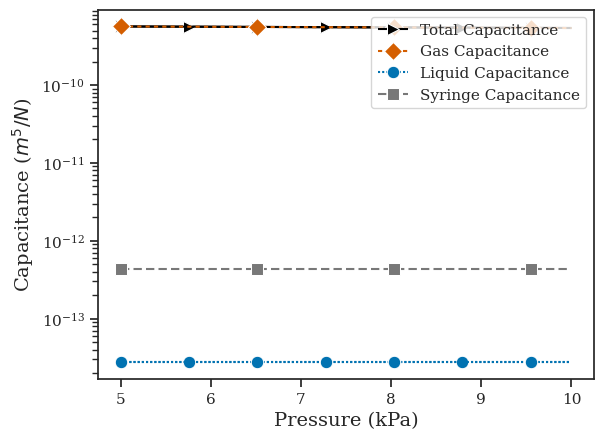

In [17]:
dat = np.transpose(np.array([C_gas + C_device, C_gas, C_liquid, C_device*np.linspace(1,1,100)]))
data = pd.DataFrame(dat, (P_range-101325)/1000, columns = ['Total Capacitance', 'Gas Capacitance', 
                                                         'Liquid Capacitance', 'Syringe Capacitance'])

plt.rc('font', family = 'serif')
fig = plt.plot(figsize = (7.2, 4.45))

data_1 = data.drop(["Gas Capacitance", "Syringe Capacitance"], 1)
sb.lineplot(data = data_1, palette = [p[0], p[2]], dashes = [d[0], d[2]], markers = [m[0], m[2]], 
            markevery = 15, markersize = 9, legend = False)

sb.lineplot(data=data, palette = p, dashes = d, markers = m, 
            markevery = 30, markersize = 9, linewidth=1.5)

plt.yscale('log')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc = 'upper right')
plt.xlabel('Pressure (kPa)', size=14)
plt.ylabel('Capacitance ($m^5/N$)', size = 14)

plt.savefig(loc + 'syringe_capacitance_log.svg',dpi=400)

### Zoom in for liquid and device

In [18]:
V_range = (60 - np.array(( 0, 4.1, 10.5, 16.1, 21.0, 25.4, 29.2, 34.2, 37.2, 39.9, 42.2, 44.33, 46.1, 47.7, 49.09, 60)))*10**-6
t = np.array(( 0, 8.23, 21.04, 32.23, 42.06, 50.745, 58.423, 68.331, 74.466, 79.84, 84.54, 88.66, 92.28, 95.4, 98.19, 105))

V_evacuated = (np.array(( 0, 4.1, 10.5, 16.1, 21.0, 25.4, 29.2, 34.2, 37.2, 39.9, 42.2, 44.33, 46.1, 47.7, 49.09, 60)))*10**-6

C_fluid = V_range/101325
C_liquid = V_range/(10**9)
C_device = 2*V_range*r/(b*E)*(1-v/2)

/var/folders/9x/bp1w9_ts2771qtwyp_k_pxgr0000gn/T/ipykernel_57555/3982038985.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_1 = data.drop(["Gas Capacitance", "Syringe Capacitance"], 1)


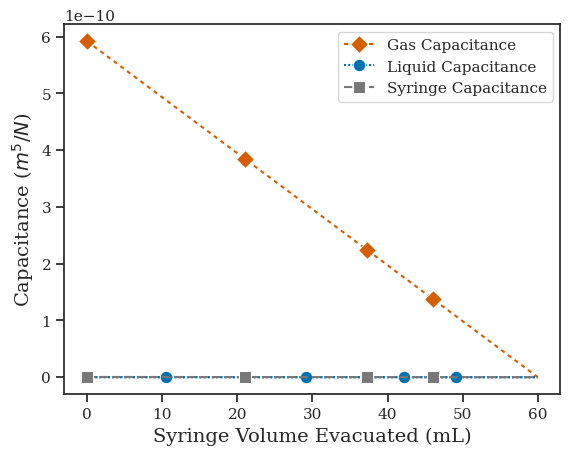

In [19]:
dat = np.transpose(np.array([C_fluid, C_liquid, C_device]))
data = pd.DataFrame(dat, V_evacuated * 10**6, columns = ['Gas Capacitance', 'Liquid Capacitance', 'Syringe Capacitance'])

plt.rc('font', family = 'serif')
fig = plt.plot(figsize = (7.2, 4.45))

data_1 = data.drop(["Gas Capacitance", "Syringe Capacitance"], 1)
sb.lineplot(data = data_1, palette = [p[2]], dashes = [d[2]], markers = [m[2]], 
            markevery = 2, markersize = 9, legend = False)

sb.lineplot(data=data, palette = p[1:], dashes = d[1:], markers = m[1:], 
            markevery = 4, markersize = 9, linewidth=1.5)

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc='upper right')
plt.xlabel('Syringe Volume Evacuated (mL)', size=14)
plt.ylabel('Capacitance ($m^5/N$)', size = 14)

plt.savefig(loc + 'volume_capacitance_linear.svg',dpi=400)

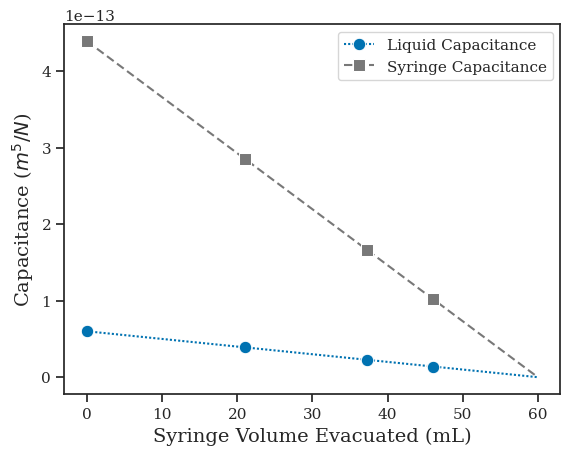

In [20]:
n = np.size
dat = np.transpose(np.array([C_liquid, C_device]))
data = pd.DataFrame(dat, V_evacuated * 10**6, columns = ['Liquid Capacitance', 'Syringe Capacitance'])

plt.rc('font', family = 'serif')
fig = plt.plot(figsize = (7.2, 4.45))

#data_1 = data.drop(["Gas Capacitance", "Syringe Capacitance"], 1)
#sb.lineplot(data = data_1, palette = [p[2]], dashes = [d[2]], markers = [m[2]], 
#            markevery = 2, markersize = 9, legend = False)


sb.lineplot(data=data, palette = p[2:], dashes = d[2:], markers = m[2:], 
            markevery = 4, markersize = 9, linewidth=1.5)

plt.legend(loc='upper right')
plt.xlabel('Syringe Volume Evacuated (mL)', size=14)
plt.ylabel('Capacitance ($m^5/N$)', size = 14)

plt.savefig(loc + 'exploded_volume_capacitance_linear.svg',dpi=400)